In [ ]:
from google.colab import drive

# data wrangling & pre-processing
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

#model validation
from sklearn.metrics import log_loss,roc_auc_score,precision_score,f1_score,recall_score,roc_curve,auc
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,fbeta_score,matthews_corrcoef
from sklearn import metrics

# cross validation
from sklearn.model_selection import StratifiedKFold

# machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier,ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

import xgboost as xgb

from scipy import stats

In [ ]:
data = pd.read_csv('/content/sample_data/heart_statlog_cleveland_hungary_final.csv')

In [ ]:
data.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [ ]:
# renaming to proper name
data.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope','target']

In [ ]:
data.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [ ]:
data['chest_pain_type'].value_counts()

chest_pain_type
4    625
3    283
2    216
1     66
Name: count, dtype: int64

In [ ]:
data['rest_ecg'].value_counts()

rest_ecg
0    684
2    325
1    181
Name: count, dtype: int64

In [ ]:
# converting categorical features

data['st_slope'][data['st_slope'] == 1] = 'upsloping'
data['st_slope'][data['st_slope'] == 2] = 'flat'
data['st_slope'][data['st_slope'] == 3] = 'downsloping'

<ipython-input-9-b1b090fb0b8e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['st_slope'][data['st_slope'] == 1] = 'upsloping'


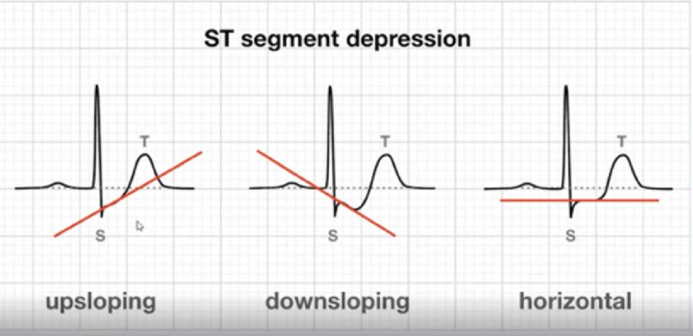

In [ ]:
data['st_slope'].value_counts()

st_slope
flat           582
upsloping      526
downsloping     81
0                1
Name: count, dtype: int64

In [ ]:
data.drop(data[data.st_slope ==0].index, inplace=True)

In [ ]:
data.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,target
count,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000
mean,53.708158,0.763667,3.232969,132.138772,210.376787,0.212784,0.698907,139.739277,0.387721,0.923549,0.528175
std,9.352961,0.425008,0.935850,18.369251,101.462185,0.409448,0.870489,25.527386,0.487435,1.086464,0.499416
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,141.000000,0.000000,0.600000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,270.000000,0.000000,2.000000,160.000000,1.000000,1.600000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,1.000000


In [ ]:
## Vérification des entrées manquantes dans l'ensemble de données.
data.isna().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
target                     0
dtype: int64

resting_blood_pression et le cholestrol ont des valeurs aberrantes car ils ont une valeur minimale de 0, tandis que le cholestrol a une valeur aberrante sur la valeur du max (603)

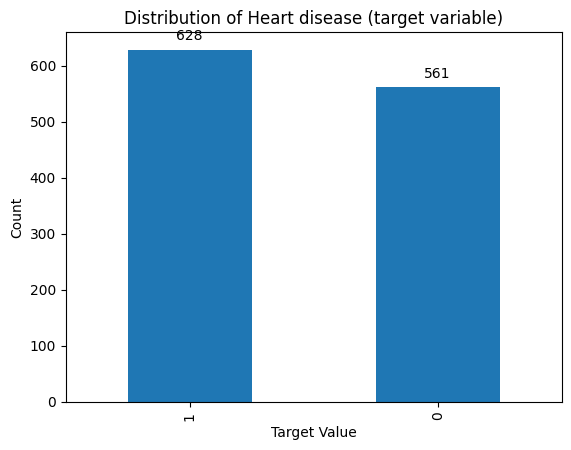

In [ ]:
# prompt: Distribution of Heart disease (target variable)(show max number of each one)

import matplotlib.pyplot as plt

# Get the count of each unique value in the 'target' column
counts = data['target'].value_counts()

# Plot the counts as a bar chart
counts.plot(kind='bar')

# Add annotations to show the exact count on each bar
for p in plt.gca().patches:
    plt.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.title('Distribution of Heart disease (target variable)')
plt.xlabel('Target Value')
plt.ylabel('Count')
plt.show()




L'ensemble de données est équilibré et comprend 628 patients atteints de maladies cardiaques et 561 patients normaux.

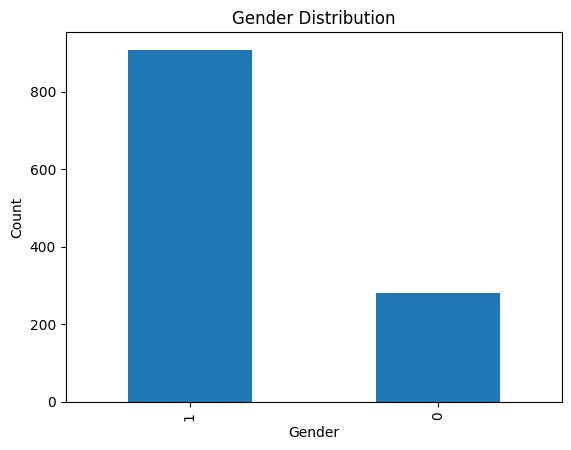

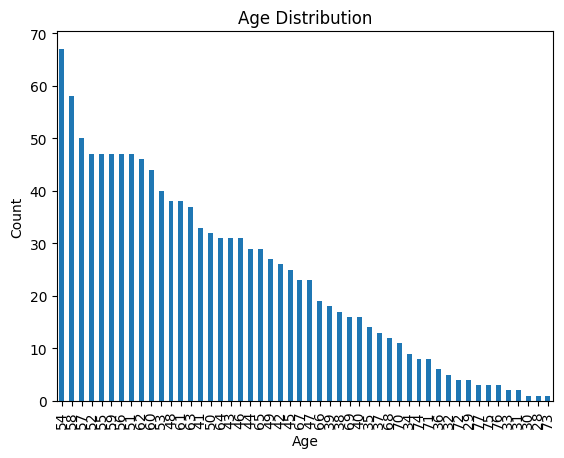

In [ ]:
# Checking Gender and age Distribution

import matplotlib.pyplot as plt

# Create a new figure
plt.figure()

# Plot the distribution of gender
data['sex'].value_counts().plot(kind='bar')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

# Create a new figure
plt.figure()

# Plot the distribution of age
data['age'].value_counts().plot(kind='bar')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

# Display the plots
plt.show()


Comme nous pouvons le voir sur le graphique ci-dessus, dans cet ensemble de données, le pourcentage d'hommes est bien trop supérieur à celui des femmes, alors que l'âge moyen des patients est d'environ 50 ans.

<ipython-input-16-64681b3329fa>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=attr_0, palette='viridis')
<ipython-input-16-64681b3329fa>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['Female', 'Male'])


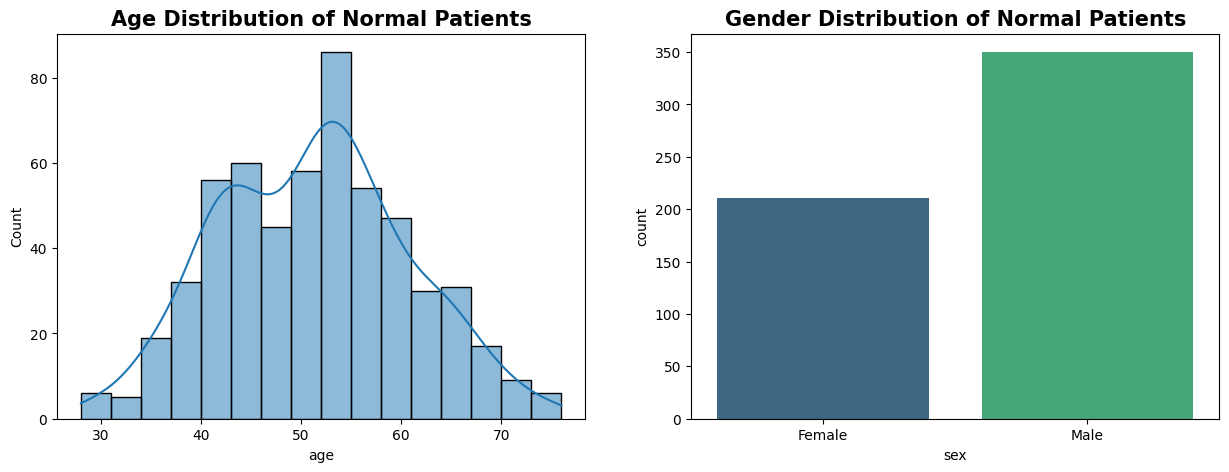

<ipython-input-16-64681b3329fa>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=attr_1, palette='viridis')
<ipython-input-16-64681b3329fa>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['Female', 'Male'])


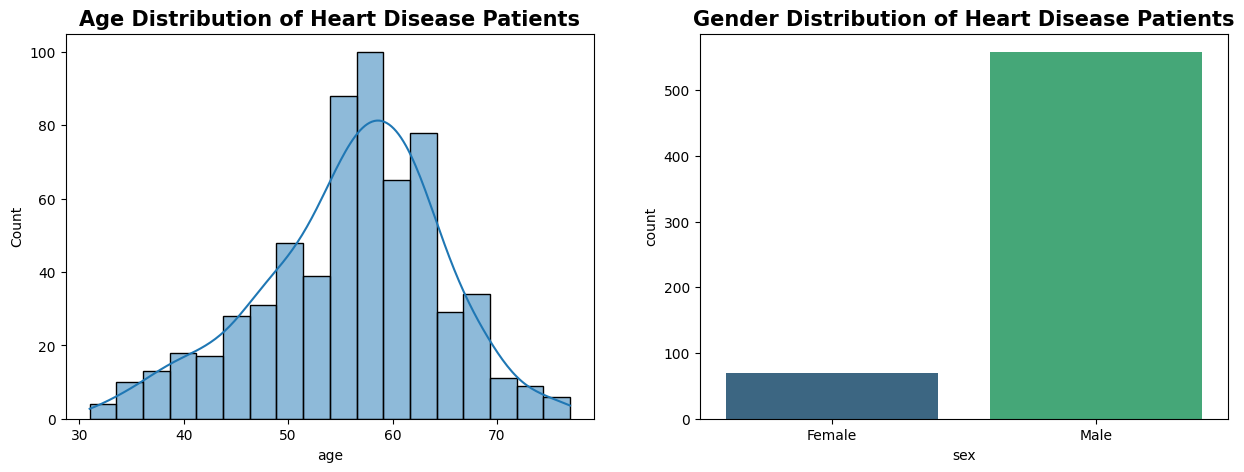

In [ ]:
# Creating separate dataframes for patients with and without heart disease
attr_1 = data[data['target'] == 1]
attr_0 = data[data['target'] == 0]

# Plotting age distribution and gender distribution of normal patients
fig = plt.figure(figsize=(15, 5))

ax1 = plt.subplot2grid((1, 2), (0, 0))
sns.histplot(attr_0['age'], kde=True)
plt.title('Age Distribution of Normal Patients', fontsize=15, weight='bold')

ax2 = plt.subplot2grid((1, 2), (0, 1))
sns.countplot(x='sex', data=attr_0, palette='viridis')
plt.title('Gender Distribution of Normal Patients', fontsize=15, weight='bold')
ax2.set_xticklabels(['Female', 'Male'])

plt.show()

# Plotting age distribution and gender distribution of heart disease patients
fig = plt.figure(figsize=(15, 5))

ax1 = plt.subplot2grid((1, 2), (0, 0))
sns.histplot(attr_1['age'], kde=True)
plt.title('Age Distribution of Heart Disease Patients', fontsize=15, weight='bold')

ax2 = plt.subplot2grid((1, 2), (0, 1))
sns.countplot(x='sex', data=attr_1, palette='viridis')
plt.title('Gender Distribution of Heart Disease Patients', fontsize=15, weight='bold')
ax2.set_xticklabels(['Female', 'Male'])

plt.show()


Comme nous pouvons le voir sur le graphique ci-dessus, il y a plus de patients masculins atteints de maladies cardiaques en comparaison aux femmes, alors que l'âge moyen des patients atteints de maladies cardiaques se situe autour de 55 à 62 ans.

#detecting outliers
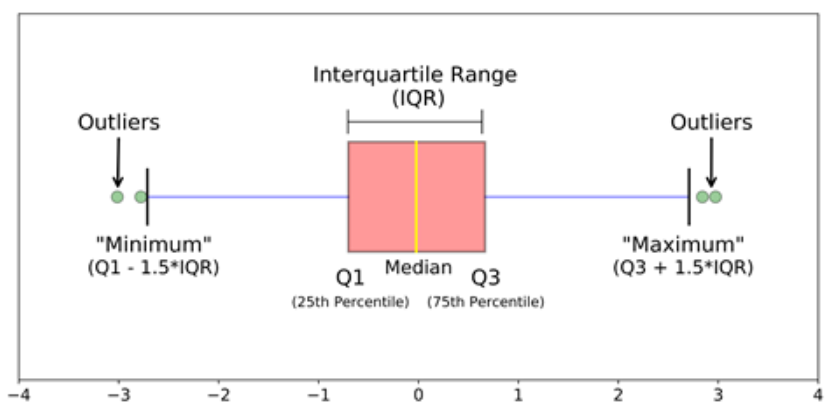

Outliers detected using Z-score method:
age: 0 outliers
sex: 0 outliers
chest_pain_type: 0 outliers
resting_blood_pressure: 10 outliers
cholesterol: 5 outliers
fasting_blood_sugar: 0 outliers
rest_ecg: 0 outliers
max_heart_rate_achieved: 2 outliers
exercise_induced_angina: 0 outliers
st_depression: 11 outliers
target: 0 outliers


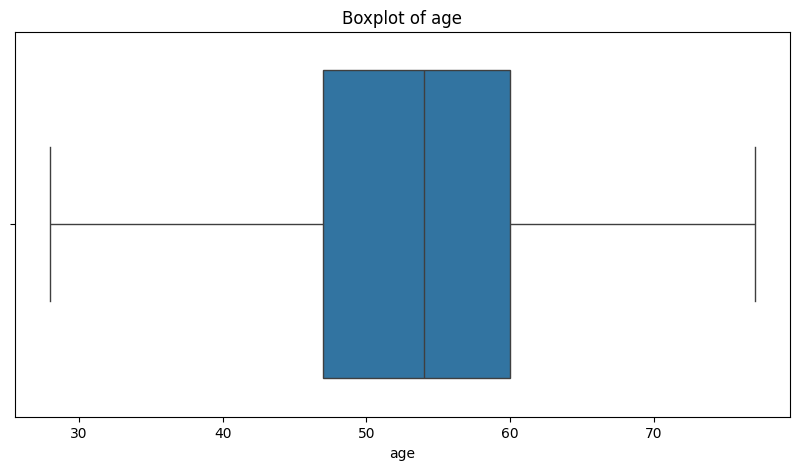

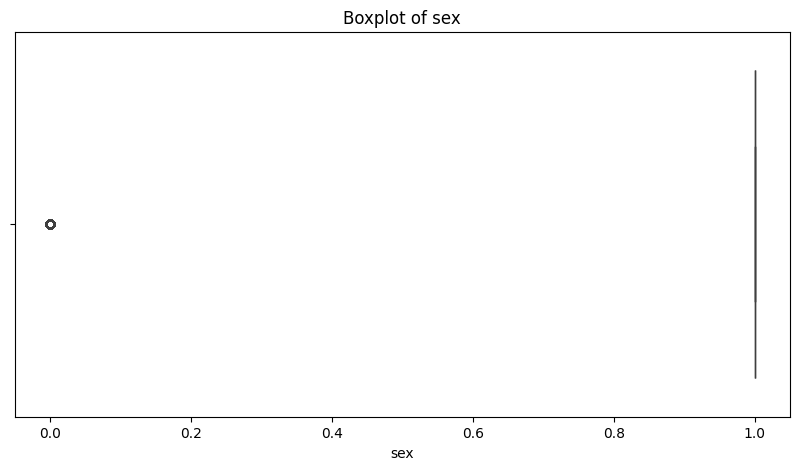

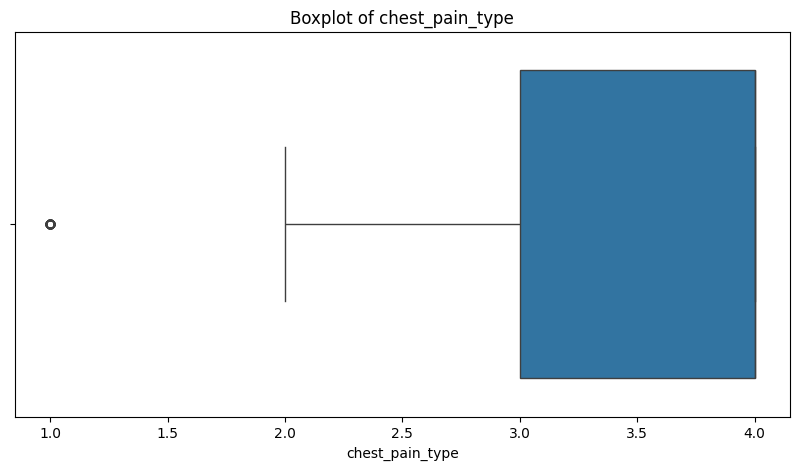

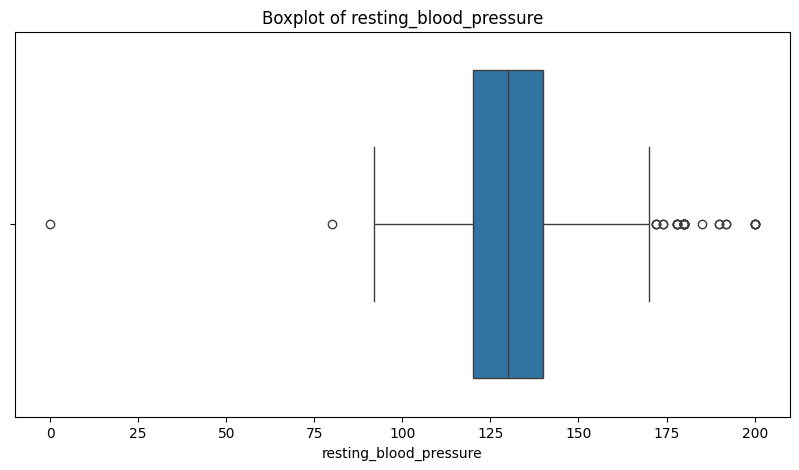

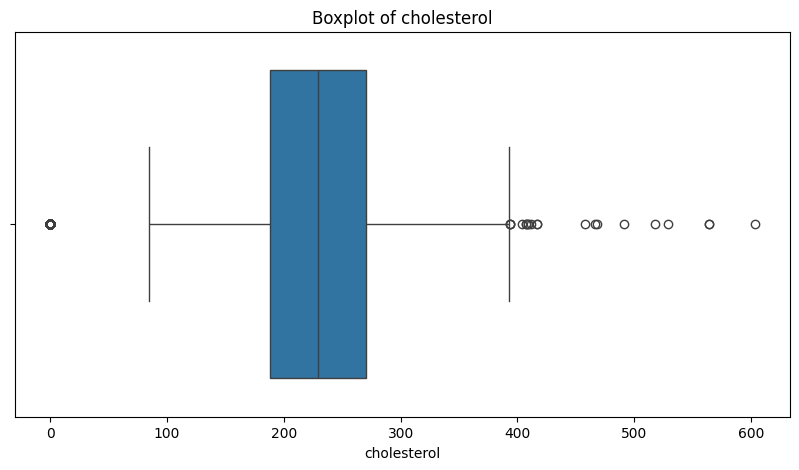

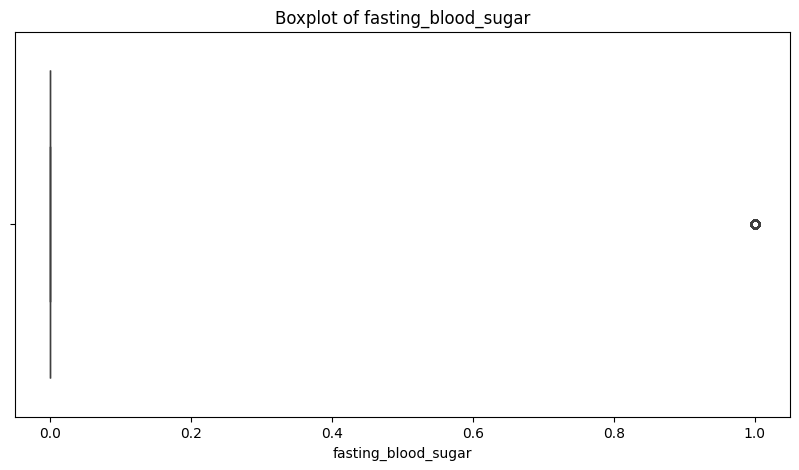

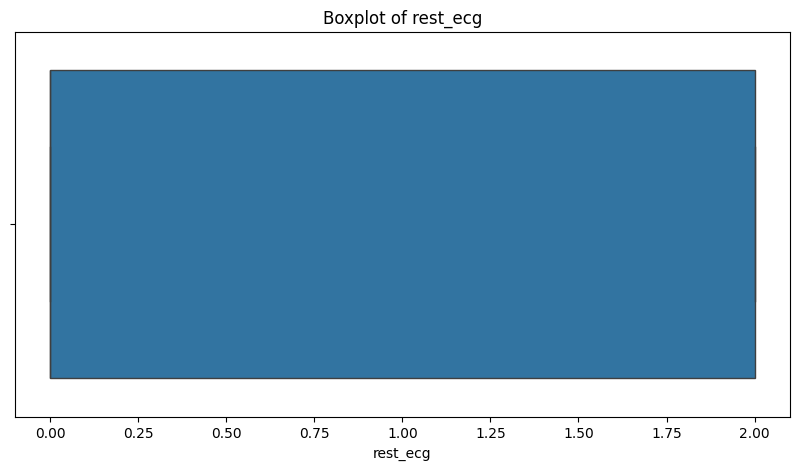

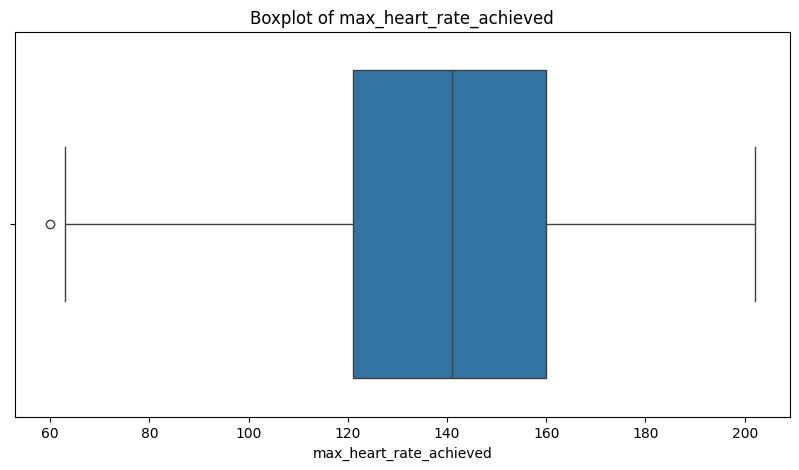

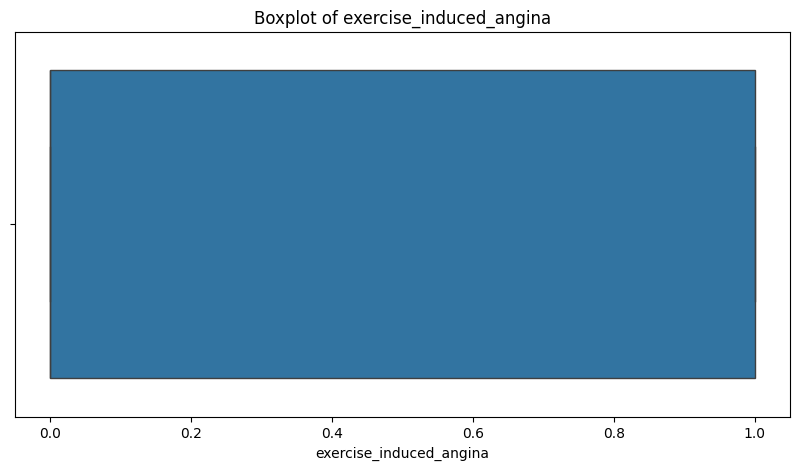

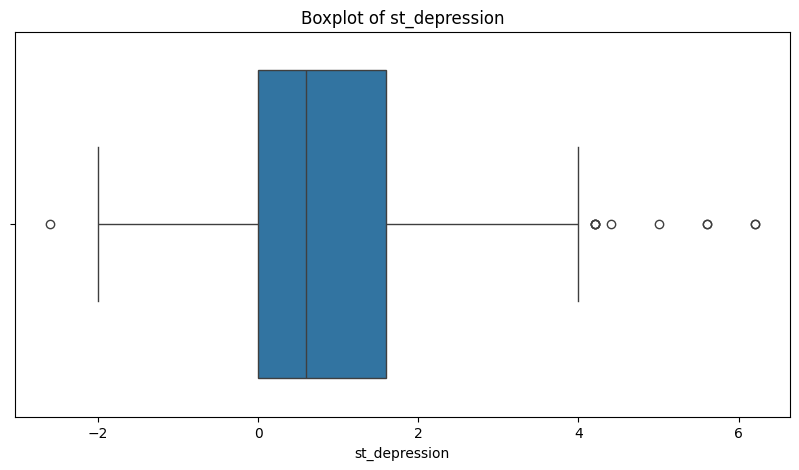

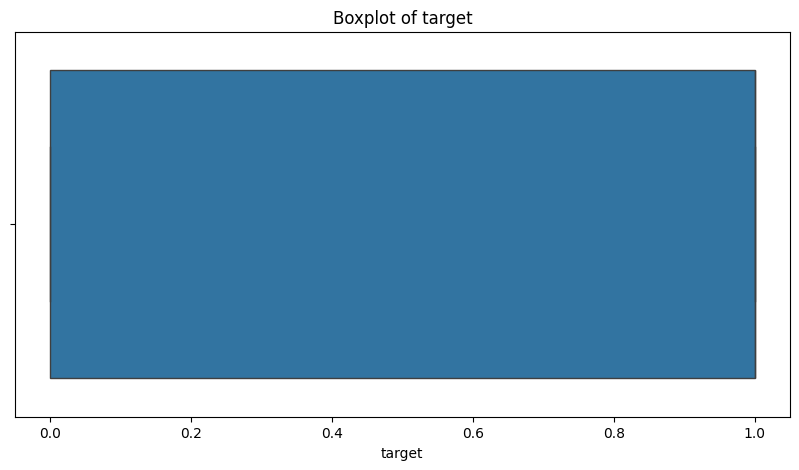

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Function to detect outliers using Z-score
def detect_outliers_zscore(data, threshold=3):
    outliers = {}
    for col in data.select_dtypes(include=[np.number]).columns:
        z_scores = np.abs((data[col] - data[col].mean()) / data[col].std())
        outliers[col] = data[z_scores > threshold]
    return outliers


# Detecting outliers using Z-score
outliers_zscore = detect_outliers_zscore(data)
print("Outliers detected using Z-score method:")
for col, outlier in outliers_zscore.items():
    print(f"{col}: {len(outlier)} outliers")



# Visualizing outliers with boxplots
for col in data.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [ ]:
# Removing outliers using Z-score

def remove_outliers_zscore(data, threshold=3):
    for col in data.select_dtypes(include=[np.number]).columns:
        z_scores = np.abs((data[col] - data[col].mean()) / data[col].std())
        data = data[z_scores <= threshold]
    return data

data = remove_outliers_zscore(data)
print("Data shape after removing outliers:", data.shape)

Data shape after removing outliers: (1161, 12)


Outliers detected using Z-score method:
age: 0 outliers
sex: 0 outliers
chest_pain_type: 0 outliers
resting_blood_pressure: 2 outliers
cholesterol: 0 outliers
fasting_blood_sugar: 0 outliers
rest_ecg: 0 outliers
max_heart_rate_achieved: 0 outliers
exercise_induced_angina: 0 outliers
st_depression: 8 outliers
target: 0 outliers


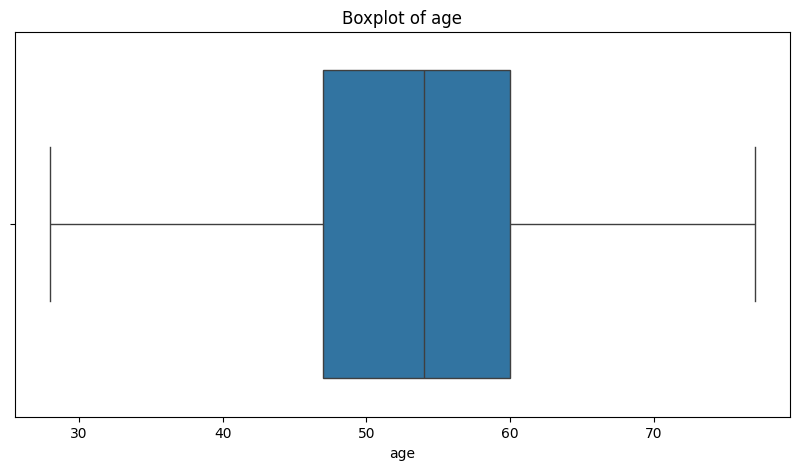

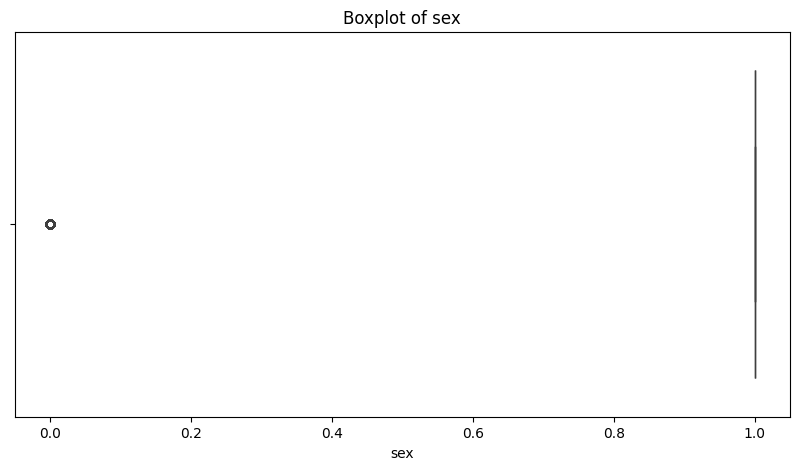

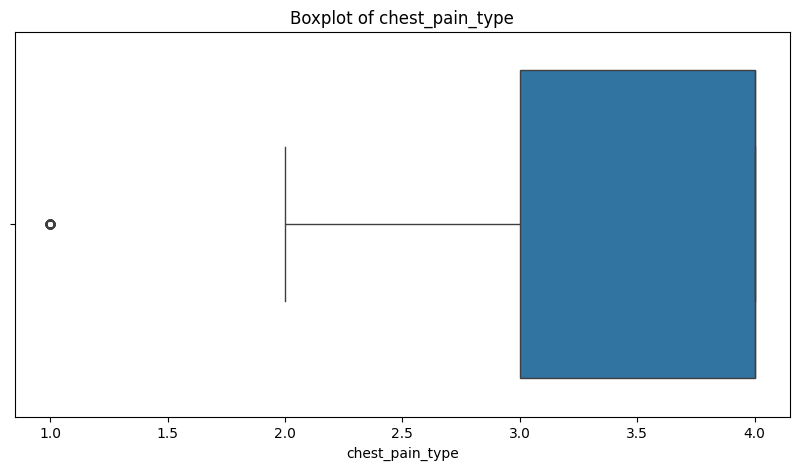

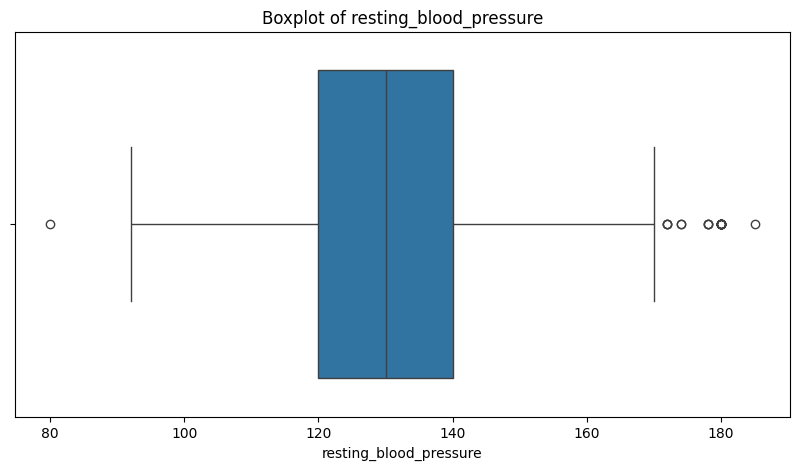

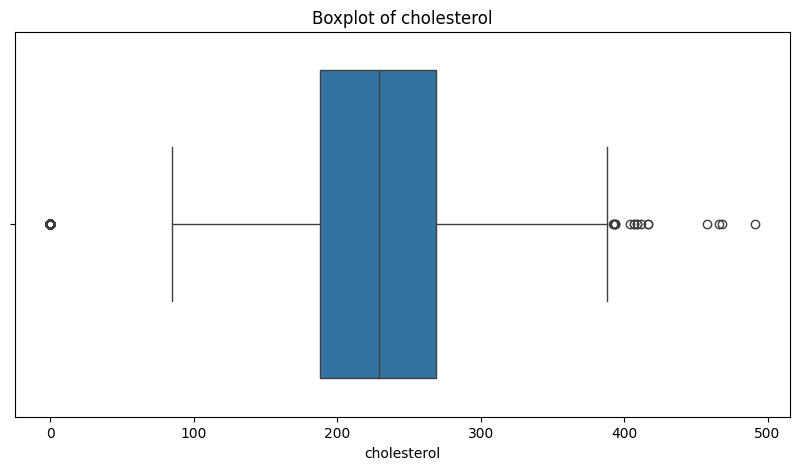

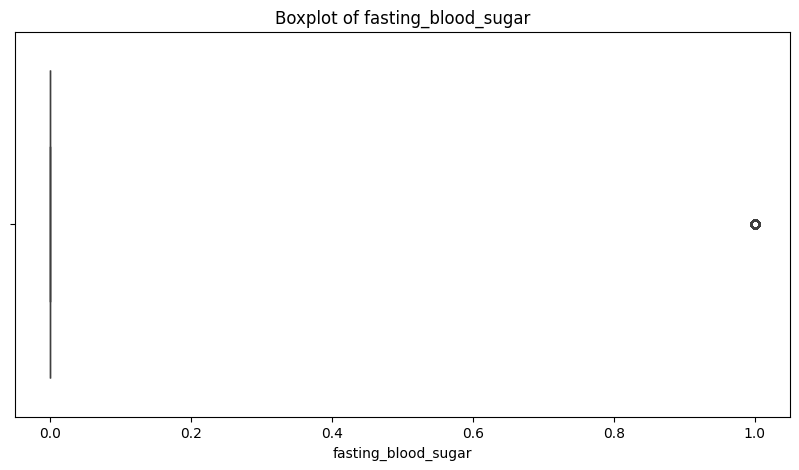

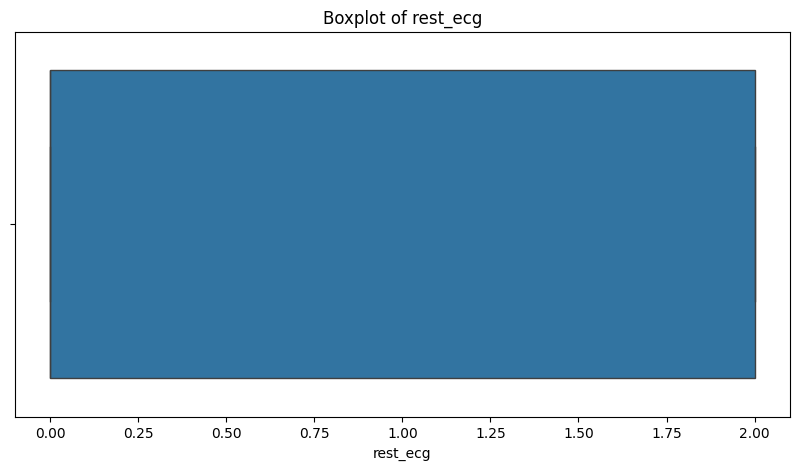

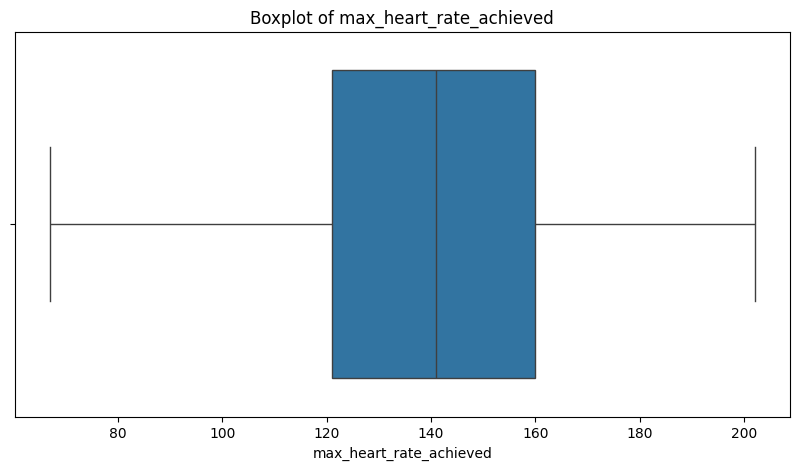

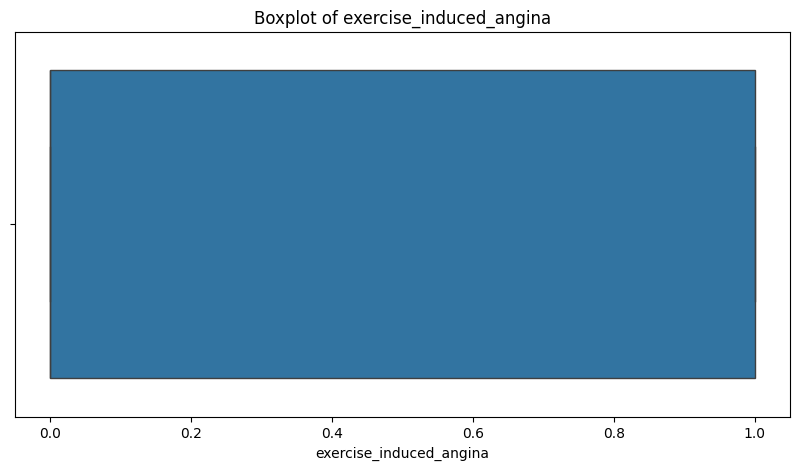

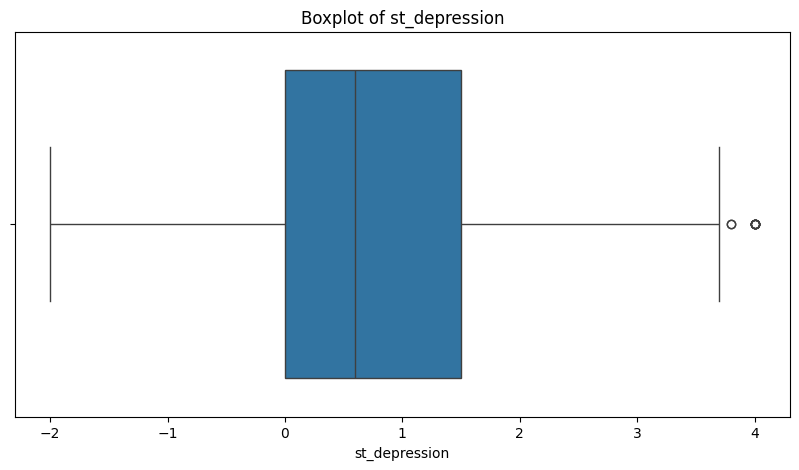

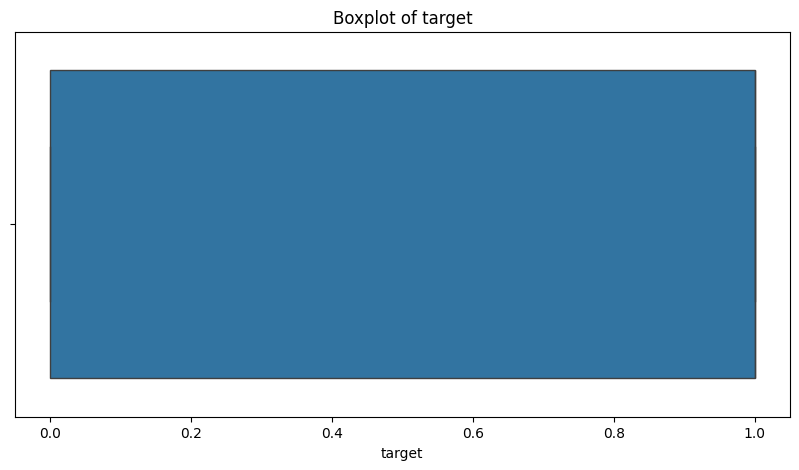

In [ ]:
# Detecting outliers using Z-score
outliers_zscore = detect_outliers_zscore(data)
print("Outliers detected using Z-score method:")
for col, outlier in outliers_zscore.items():
    print(f"{col}: {len(outlier)} outliers")

for col in data.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# model training

In [ ]:

# encoding categorical variables
data = pd.get_dummies(data, drop_first=True)



# segregating dataset into features X and target Y
X = data.drop(['target'],axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:

import warnings

# Suppress warnings
warnings.filterwarnings('ignore')
# Define a dictionary of models to test
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest Classifier': RandomForestClassifier(n_estimators=100),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Gradient Boosting Classifier': GradientBoostingClassifier(),
    'XGBoost Classifier': xgb.XGBClassifier(),
    'MLP Classifier': MLPClassifier(hidden_layer_sizes=(10, 10))
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name}: Accuracy = {accuracy:.3f}")
    print(f"{name}: Classification Report:\n{classification_report(y_test, y_pred)}")
    print(f"{name}: Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
    print()

Logistic Regression: Accuracy = 0.845
Logistic Regression: Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.82      0.84       114
           1       0.84      0.87      0.85       119

    accuracy                           0.85       233
   macro avg       0.85      0.85      0.85       233
weighted avg       0.85      0.85      0.85       233

Logistic Regression: Confusion Matrix:
[[ 94  20]
 [ 16 103]]

Random Forest Classifier: Accuracy = 0.914
Random Forest Classifier: Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.88      0.91       114
           1       0.89      0.95      0.92       119

    accuracy                           0.91       233
   macro avg       0.92      0.91      0.91       233
weighted avg       0.92      0.91      0.91       233

Random Forest Classifier: Confusion Matrix:
[[100  14]
 [  6 113]]

Decision Tree Classifier: Accuracy = 0.84

Sur la base des scores de précision, le meilleur modèle est le gradient Boosting Classifier et le XGBoost Classifier, tous deux avec une précision de 0,918.

In [ ]:
import pickle
import xgboost as xgb # Import the xgboost library

model = xgb.XGBClassifier().fit(X_train, y_train)
# Save the model
filename = 'finalized_model.pkl'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
# prompt: test the model with a new generated data, feel free to generate the data

import pandas as pd
import numpy as np
# Generate some new data
new_data = pd.DataFrame({
    'age': np.random.randint(low=30, high=80, size=100),
    'sex': np.random.choice([0, 1], size=100),
    'chest_pain_type': np.random.choice([0, 1, 2, 3], size=100),
    'resting_blood_pressure': np.random.randint(low=90, high=180, size=100),
    'cholesterol': np.random.randint(low=100, high=300, size=100),
    'fasting_blood_sugar': np.random.choice([0, 1], size=100),
    'rest_ecg': np.random.choice([0, 1, 2], size=100),
    'max_heart_rate_achieved': np.random.randint(low=80, high=200, size=100),
    'exercise_induced_angina': np.random.choice([0, 1], size=100),
    'st_depression': np.random.uniform(low=0, high=5, size=100),
    'st_slope_flat': np.random.choice([0, 1], size=100),
    'st_slope_upsloping': np.random.choice([0, 1], size=100)
})

# Encode categorical variables
new_data = pd.get_dummies(new_data, drop_first=True)

# Make predictions
predictions = model.predict(new_data)

print(predictions)

[1 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 1
 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0 1 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 1 1 0 1 0
 0 1 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 1 0 1 0 1 1 1 0]
